In [19]:
import numpy as np
import scipy.stats as stats
import scipy.special as sps
import math
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
plt.style.use('seaborn-poster')

nu = 0.4
beta = 100
nu_beta = nu/beta
P = 1.2
x_0 = 1
x_1 = -6
E_A = -6
E_A2 = E_A**2
E_invR = 1/0.00001

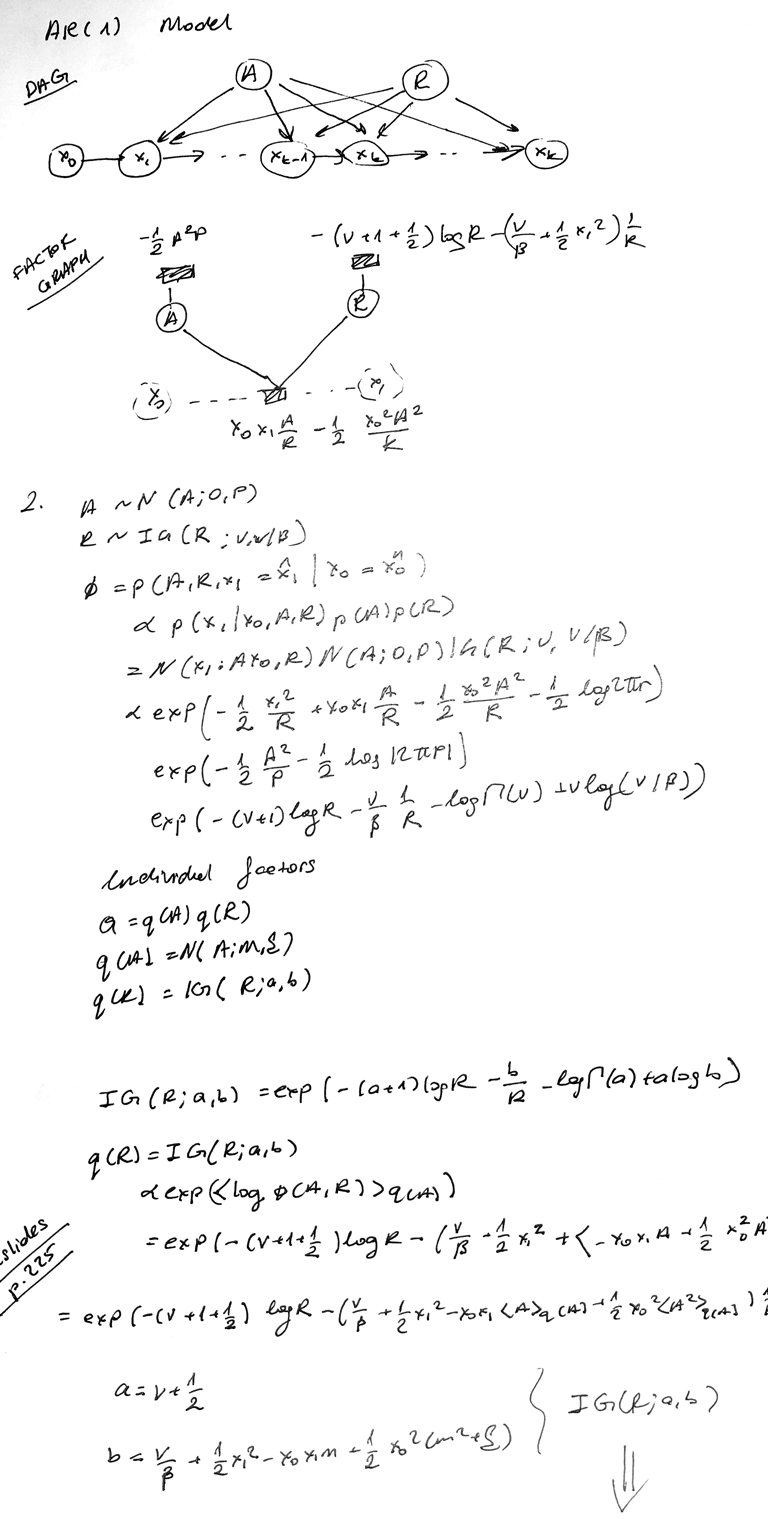

In [22]:
Image('slns.png')

## Joint Dist Contour

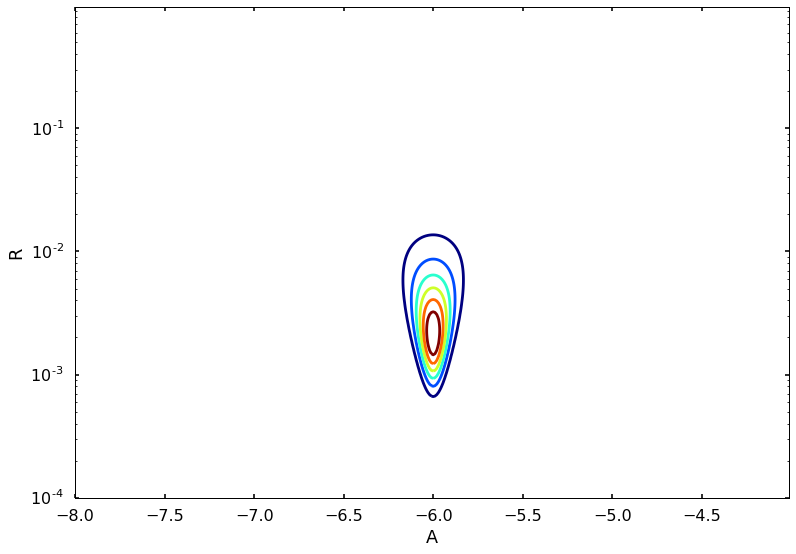

In [83]:
x = np.arange(-8.0, -4, 0.01)
y = np.power(10.0, np.arange(-4.0, 0.0, 0.01))
A, R = np.meshgrid(x,y)
a = nu + 0.5
b = nu_beta + 0.5 * (0.5*x_1**2 - x_1*x_0*A + 0.5*x_0**2*A*A) 
Z = np.exp(-(a+1)*np.log(R)-b/R-np.log(sps.gamma(a))+a)
plt.contour(A, R, Z)
plt.xlabel('A')
plt.ylabel('R')
plt.yscale('log')

## EM MAP A,R

In [12]:
T = 70
qa = []
qr = []
for t in range(2,T):
    sig = 1/ (1/P + x_0**2 * E_invR)
    mu = sig*x_0*x_1*E_invR
    E_A = mu
    E_A2 = mu**2 + sig
    
    a = nu + 0.5
    b = 0.5 * (x_1**2 - 2*x_1*x_0*E_A + x_0**2*E_A2) + nu_beta
    
    E_invR = a/b
    qa.append(E_A)
    qr.append(E_invR)
    
print "A\t", qa[-1]
print "R\t", qr[-1]

A	-0.370434757455
R	0.054834719541


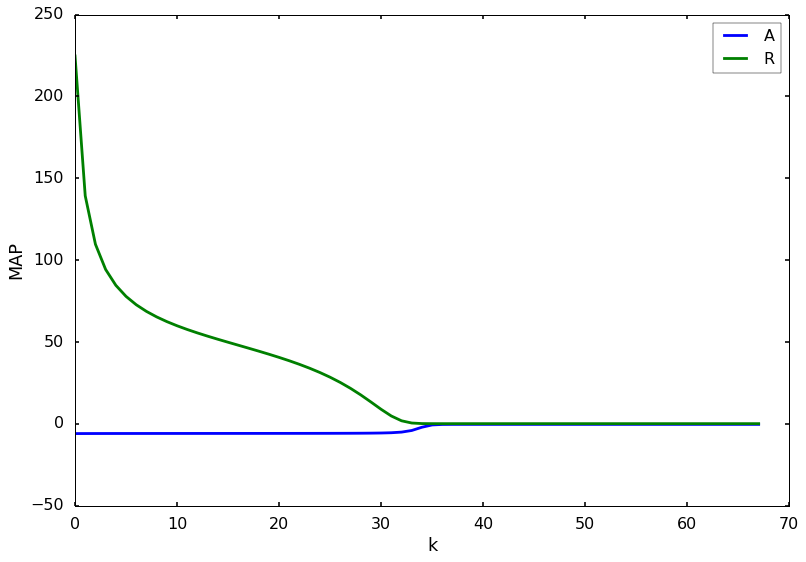

In [17]:
plt.plot(qa, label="A")
plt.plot(qr, label="R")
plt.legend(loc=0)
plt.xlabel('k')
plt.ylabel('MAP')

## AR(1) Model

(0.0001, 100000)

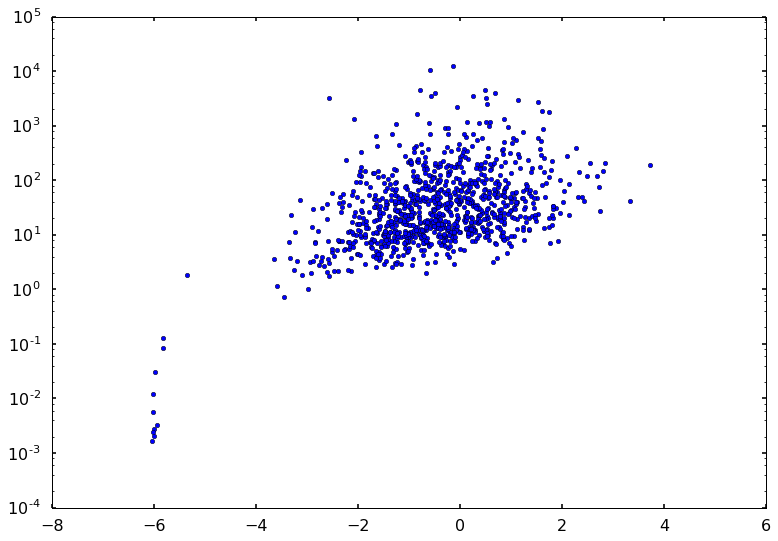

In [18]:
T = 1000
R = np.zeros(T)
A = np.zeros(T)
A[0] = -6
R[0] = 0.00001

for t in range(1, T):
    Sig = 1/(1/P + x_0**2 *(1/R[t-1]))
    mu = Sig * x_0 * x_1 * (1/R[t-1]);
    A[t] = np.sqrt(Sig) * np.random.randn() + mu;

    b = 0.5*(x_1**2 - 2*x_1*x_0*A[t] + x_0**2*A[t]**2) + nu_beta;
    R[t] = 1/(np.random.gamma(nu+0.5, 1/b));
    
plt.scatter(A,R)
plt.yscale("log")
plt.xlim(-8,6)
plt.ylim(10**-4, 10**5)